# British Airways - Virtual Experience Program

**Task 1: Web scraping to gain company insights**

## 1. Set-up

Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

plt.style.use('ggplot')

from bs4 import BeautifulSoup
import requests

## 2. Web Scraping using BeautifulSoup

In [ ]:
# Creating empty lists to collect reviews, ratings, date & country:

reviews  = []
ratings = []
date = []
country = []

Web Scraping using BeautifulSoup

In [ ]:
# Scrape the data from the Website:

for i in range(1, 36):
  # Create 'Get' Request as page:
  page = requests.get(f"https://www.airlinequality.com/airline-reviews/british-airways/page/{i}/?sortby=post_date%3ADesc&pagesize=100")

  # Vreate BeautifulSoup Object:
  soup = BeautifulSoup(page.content, "html.parser")

  # Extract Reviews:
  for item in soup.find_all("div", class_="text_content"):
    reviews.append(item.text)

  # Extract Ratings:
  for item in soup.find_all("div", class_ = "rating-10"):
      try:
        ratings.append(item.span.text)
      except:
        print(f"Error on page {i}")
        ratings.append("None")

  # Extract Dates:
  for item in soup.find_all("time"):
    date.append(item.text)

  # Extract Countries:
  for item in soup.find_all("h3"):
    country.append(item.span.next_sibling.text.strip(" ()"))


Error on page 31
Error on page 33
Error on page 33
Error on page 35
Error on page 35


In [ ]:
# Check the length of total reviews extracted:

print(f"The length of Reviews is: {len(reviews)}")
print(f"The length of Ratings is: {len(ratings)}")
print(f"The length of Date is: {len(date)}")
print(f"The length of Country is: {len(country)}")

The length of Reviews is: 3500
The length of Ratings is: 3535
The length of Date is: 3500
The length of Country is: 3500


In [ ]:
# Size of lists have to be same for creation of a DataFrame
# Remove last elements from the lists.
# We need 1000 elements/records for analysis

k = 2500
l = 2535

new_reviews = reviews[:-k]
new_date = date[:-k]
new_country = country[:-k]
new_ratings = ratings[:-l]

len(new_ratings)

1000

In [ ]:
# Create a DataFrame:

df = pd.DataFrame({"Reviews":new_reviews,"Ratings": new_ratings, "Date": new_date, "Country": new_country})

In [ ]:
df

,Reviews,Ratings,Date,Country
0,✅ Trip Verified | The airplanes and the lounge...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t5,28th September 2023,United States
1,✅ Trip Verified | One of the worst experiences...,4,28th September 2023,United Kingdom
2,✅ Trip Verified | Cancelled our flight last-m...,1,27th September 2023,United Kingdom
3,"✅ Trip Verified | I had a flight from Miami, F...",1,23rd September 2023,United States
4,✅ Trip Verified | We started our day with BA ...,1,22nd September 2023,United States
...,...,...,...,...
995,✅ Trip Verified | We have been loyal customer...,2,7th December 2018,United States
996,✅ Trip Verified | Gatwick to Las Vegas. Board...,6,5th December 2018,United Kingdom
997,Not Verified | Nassau to London. Premium Econ...,2,3rd December 2018,United Kingdom
998,✅ Trip Verified | Phoenix to Accra via London...,1,30th November 2018,Ghana


In [ ]:
df.shape

(1000, 4)

In [ ]:
from google.colab import files

df.to_csv("BA_Reviews.csv")
files.download("BA_Reviews.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## 3. Data Cleaning

Cleaning the data

In [ ]:
df.dtypes

In [ ]:
df.duplicated().any()

False

In [ ]:
# Checking unique values in Ratings:
df.Ratings.unique()

array(['\n\t\t\t\t\t\t\t\t\t\t\t\t\t5', '4', '1', '6', '2', '8', '3', '7',
       '10', '9', '5'], dtype=object)

In [ ]:
# Remove the \t and \n from the Ratings:
df.Ratings = df.Ratings.str.strip("\n\t\t\t\t\t\t\t\t\t\t\t\t\t")

In [ ]:
df.Ratings.unique()

array(['5', '4', '1', '6', '2', '8', '3', '7', '10', '9'], dtype=object)

In [ ]:
df.Ratings.value_counts()

1     347
2     118
10     98
3      90
9      77
8      72
5      57
4      57
7      46
6      38
Name: Ratings, dtype: int64

In [ ]:
df.isnull().value_counts()

Reviews  Ratings  Date   Country
False    False    False  False      1000
dtype: int64

In [68]:
# Convert "Ratings" from Object to Int:

df = df.astype({'Ratings':'int'})

In [ ]:
# Reset the index:
df.reset_index(drop=True)

,Reviews,Ratings,Date,Country
0,✅ Trip Verified | The airplanes and the lounge...,5,28th September 2023,United States
1,✅ Trip Verified | One of the worst experiences...,4,28th September 2023,United Kingdom
2,✅ Trip Verified | Cancelled our flight last-m...,1,27th September 2023,United Kingdom
3,"✅ Trip Verified | I had a flight from Miami, F...",1,23rd September 2023,United States
4,✅ Trip Verified | We started our day with BA ...,1,22nd September 2023,United States
...,...,...,...,...
995,✅ Trip Verified | We have been loyal customer...,2,7th December 2018,United States
996,✅ Trip Verified | Gatwick to Las Vegas. Board...,6,5th December 2018,United Kingdom
997,Not Verified | Nassau to London. Premium Econ...,2,3rd December 2018,United Kingdom
998,✅ Trip Verified | Phoenix to Accra via London...,1,30th November 2018,Ghana


In [ ]:
# Removing the parts before | in the reviews column:

df.Reviews= df.Reviews.str.split('|',expand=True)[1]

In [ ]:
df

,Reviews,Ratings,Date,Country
0,"The airplanes and the lounges are worn out, o...",5,28th September 2023,United States
1,One of the worst experiences on the worst air...,4,28th September 2023,United Kingdom
2,Cancelled our flight last-minute then moved ...,1,27th September 2023,United Kingdom
3,"I had a flight from Miami, Florida to Dublin,...",1,23rd September 2023,United States
4,We started our day with BA in Prague. The fl...,1,22nd September 2023,United States
...,...,...,...,...
995,We have been loyal customers with British Ai...,2,7th December 2018,United States
996,Gatwick to Las Vegas. Boarding by group numb...,6,5th December 2018,United Kingdom
997,Nassau to London. Premium Economy on BA is a...,2,3rd December 2018,United Kingdom
998,Phoenix to Accra via London. I had a great C...,1,30th November 2018,Ghana


## 3. EDA

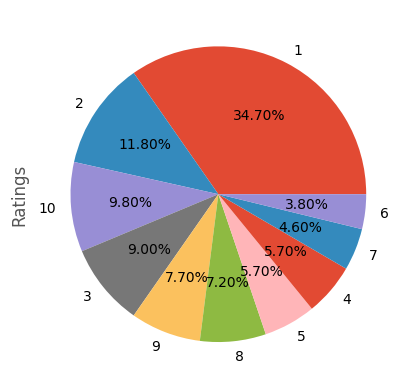

In [ ]:
# Percentage wise distribution of each Rating through 1 to 10:

df["Ratings"].value_counts().plot(kind="pie",autopct="%.2f%%")
plt.show()


In [69]:
print(df['Ratings'].mean())

4.165


Text(0.5, 0.98, 'Counts for each Rating')

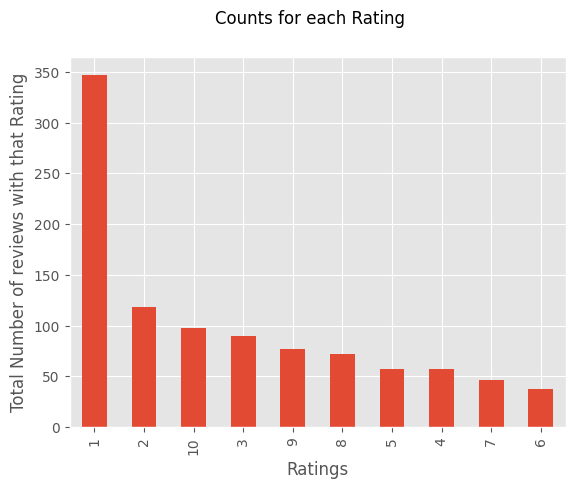

In [ ]:
df.Ratings.value_counts().plot(kind="bar")
plt.xlabel("Ratings")
plt.ylabel("Total Number of reviews with that Rating")
plt.suptitle("Counts for each Rating")

## 5. NLP

In [ ]:
# 1. Cleaning the text

import re

# Define a function to clean the text
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

# Cleaning the text in the review column
df['Cleaned Reviews'] = df['Reviews'].apply(clean)
df.head()

,Reviews,Ratings,Date,Country,Cleaned Reviews
0,"The airplanes and the lounges are worn out, o...",5,28th September 2023,United States,The airplanes and the lounges are worn out ol...
1,One of the worst experiences on the worst air...,4,28th September 2023,United Kingdom,One of the worst experiences on the worst air...
2,Cancelled our flight last-minute then moved ...,1,27th September 2023,United Kingdom,Cancelled our flight last minute then moved u...
3,"I had a flight from Miami, Florida to Dublin,...",1,23rd September 2023,United States,I had a flight from Miami Florida to Dublin I...
4,We started our day with BA in Prague. The fl...,1,22nd September 2023,United States,We started our day with BA in Prague The flig...


In [ ]:
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary:

pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    #print(tags)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
          #print(tag[0])
          #print(pos_dict.get(tag[0]))
    return newlist

df['POS tagged'] = df['Cleaned Reviews'].apply(token_stop_pos)
df.head()

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


,Reviews,Ratings,Date,Country,Cleaned Reviews,POS tagged
0,"The airplanes and the lounges are worn out, o...",5,28th September 2023,United States,The airplanes and the lounges are worn out ol...,"[(airplanes, n), (lounges, n), (worn, v), (old..."
1,One of the worst experiences on the worst air...,4,28th September 2023,United Kingdom,One of the worst experiences on the worst air...,"[(One, None), (worst, a), (experiences, n), (w..."
2,Cancelled our flight last-minute then moved ...,1,27th September 2023,United Kingdom,Cancelled our flight last minute then moved u...,"[(Cancelled, v), (flight, n), (last, a), (minu..."
3,"I had a flight from Miami, Florida to Dublin,...",1,23rd September 2023,United States,I had a flight from Miami Florida to Dublin I...,"[(flight, n), (Miami, n), (Florida, n), (Dubli..."
4,We started our day with BA in Prague. The fl...,1,22nd September 2023,United States,We started our day with BA in Prague The flig...,"[(started, v), (day, n), (BA, n), (Prague, n),..."


In [ ]:
# Lemmatization:

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,Reviews,Ratings,Date,Country,Cleaned Reviews,POS tagged,Lemma
0,"The airplanes and the lounges are worn out, o...",5,28th September 2023,United States,The airplanes and the lounges are worn out ol...,"[(airplanes, n), (lounges, n), (worn, v), (old...",airplane lounge wear old break Dallas Heathr...
1,One of the worst experiences on the worst air...,4,28th September 2023,United Kingdom,One of the worst experiences on the worst air...,"[(One, None), (worst, a), (experiences, n), (w...",One bad experience bad airline flight delay ...
2,Cancelled our flight last-minute then moved ...,1,27th September 2023,United Kingdom,Cancelled our flight last minute then moved u...,"[(Cancelled, v), (flight, n), (last, a), (minu...",Cancelled flight last minute move us onto fl...
3,"I had a flight from Miami, Florida to Dublin,...",1,23rd September 2023,United States,I had a flight from Miami Florida to Dublin I...,"[(flight, n), (Miami, n), (Florida, n), (Dubli...",flight Miami Florida Dublin Ireland via Lond...
4,We started our day with BA in Prague. The fl...,1,22nd September 2023,United States,We started our day with BA in Prague The flig...,"[(started, v), (day, n), (BA, n), (Prague, n),...",start day BA Prague flight actually leave ti...


Wordclouds

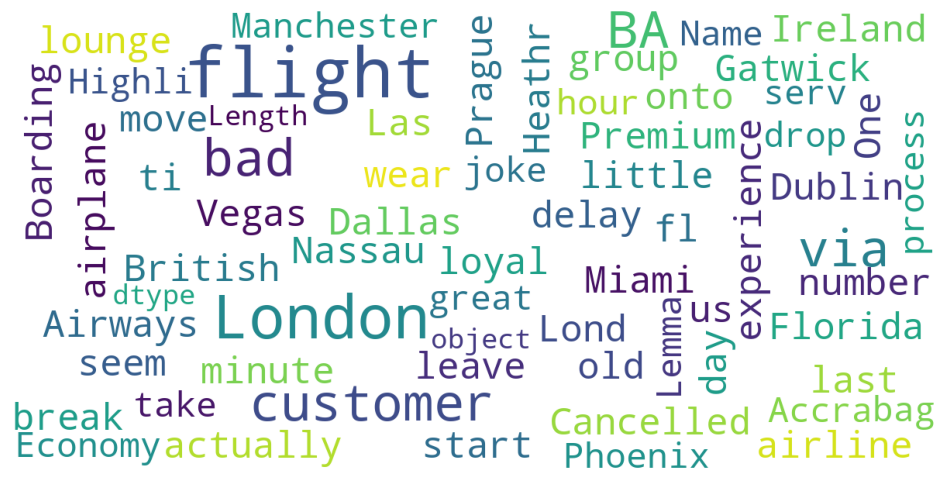

In [ ]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df.Lemma)